<a href="https://colab.research.google.com/github/HajjoujiProf/CryptoAnalysBTC-USD/blob/main/CryptoCurrAnalysBTC_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**я собираю набор данных из одного или нескольких открытых веб-API по выбору и использую Python для предварительной обработки и анализа собранных данных.**

Задание 1:
  Я выбираю один или несколько подходящих веб-API в качестве исходных данных.

Задача-2:
  Я собираю данные из выбранных API, используя Python.

Задача-3:
Я анализирую собранные данные и сохраняю их в соответствующем формате файла для последующего анализа (например, JSON, CSV, XML).

Задача-4:
Я загружаю и представляю данные как Pandas Dataframe. Примените любые шаги предварительной обработки и проверки качества, которые могут потребоваться для очистки и фильтрации данных перед анализом.

Задача-5:
Я анализирую и обобщаю очищенный набор данных, используя визуализацию 

**Задание 1: Я выбираю один или несколько подходящих веб-API в качестве исходных данных.**

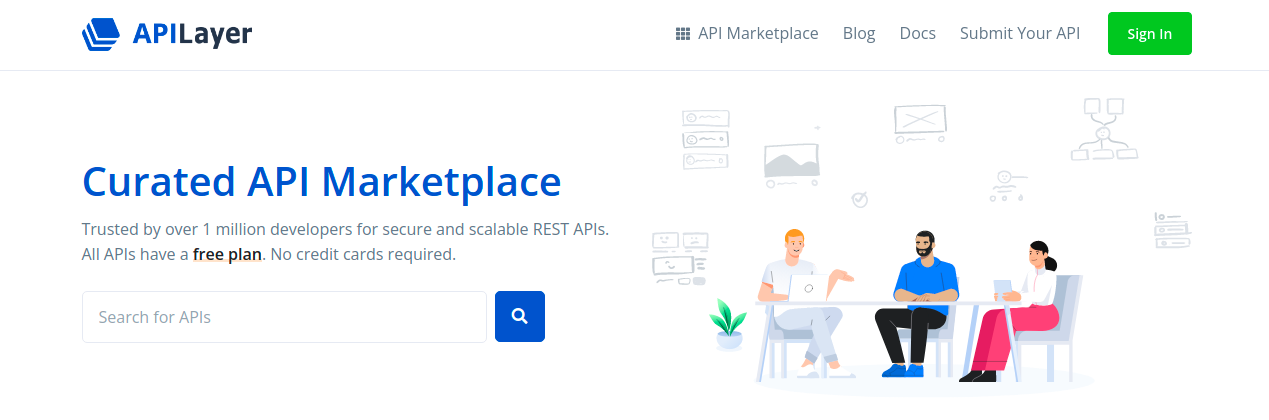

**Анализ криптовалюты с помощью Python - MACD**

**Требования**


- Питон 3
- Блокнот Юпитера
- Библиотека анализа данных Pandas
- Библиотека интерактивной визуализации боке
- Помощник по расчету фондовой статистики/показателей

**Получение данных о криптовалюте**

Я загружаю ежедневные данные о биткойнах в долларах США на бирже Bitstamp. Поддерживаются и другие биржи.

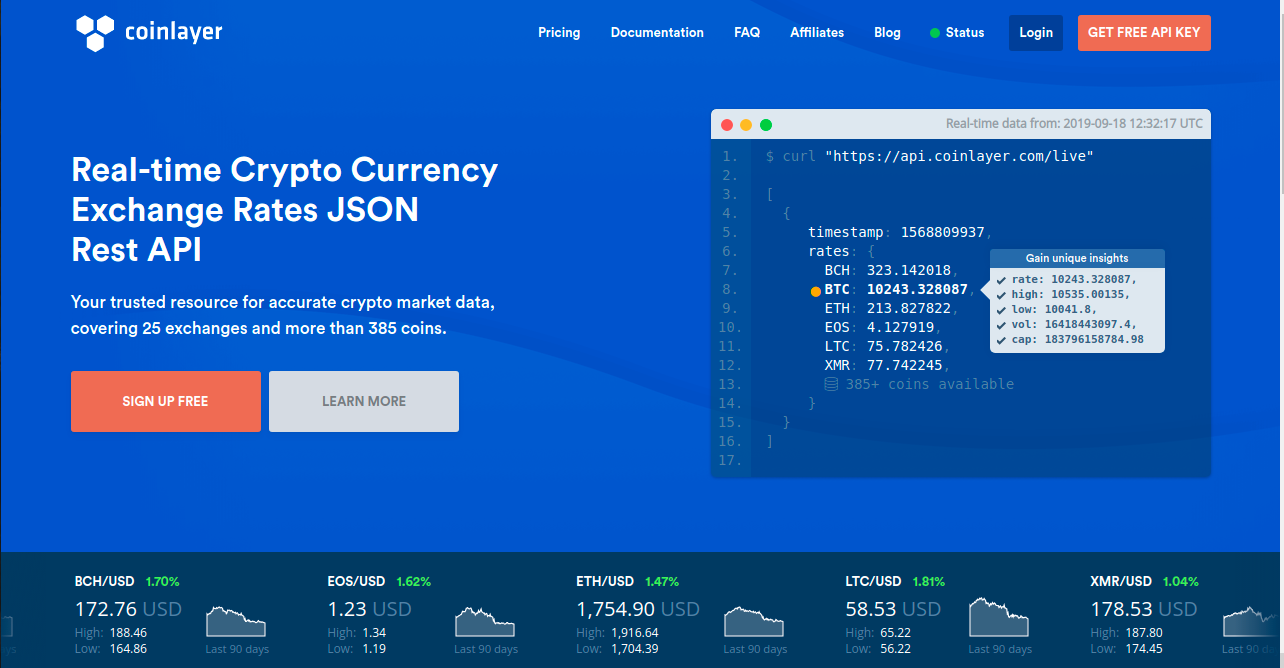

In [1]:
from_symbol = 'BTC'
to_symbol = 'USD'
exchange = 'Bitstamp'
datetime_interval = 'day'

**Cryptocompare API возвращает следующие столбцы:**

- open, цена, по которой открылся период,
- high, самая высокая цена, достигнутая в течение периода,
- low, самая низкая цена, достигнутая за период,
- close, цена закрытия периода,
- volumefrom, объем в базовой валюте, в которой торгуются вещи,
- volumeto, объем в торгуемой валюте.

**Я загружаю данные и сохраняю их в файл.**

In [ ]:
import requests
from datetime import datetime
import pandas as pd


def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)


def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,           'datetime_interval should be one of %s' % supported_intervals

    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)

    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data


def convert_to_dataframe(data):
    #df = pd.io.json.json_normalize(data, ['Data'])
    df = pd.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df


def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)

current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to BTC_USD_Bitstamp_day_2022-06-10.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


**Прочитать данные**

Мы читаем данные из файла, поэтому нам не нужно загружать его снова.

In [ ]:
import pandas as pd

def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv("/content/BTC_USD_Bitstamp_day_2022-06-10.csv")
    df.datetime = pd.to_datetime(df.datetime) # change type from object to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

df = read_dataset("/content/BTC_USD_Bitstamp_day_2022-06-10.csv")

Reading data from /content/BTC_USD_Bitstamp_day_2022-06-10.csv
(2001, 6)


In [ ]:
df.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2016-12-18,780.00,790.99,788.30,788.68,2516.86,1981286.28
2016-12-19,787.01,794.39,788.34,790.65,3878.35,3069394.12
2016-12-20,787.10,803.00,791.03,801.02,3979.47,3156234.61
2016-12-21,796.82,830.01,798.65,828.10,9191.56,7502025.03
2016-12-22,827.29,875.00,832.02,858.94,12029.93,10296745.43


In [ ]:
df.head(20)

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2016-12-18,780.00,790.99,788.30,788.68,2516.86,1981286.28
2016-12-19,787.01,794.39,788.34,790.65,3878.35,3069394.12
2016-12-20,787.10,803.00,791.03,801.02,3979.47,3156234.61
2016-12-21,796.82,830.01,798.65,828.10,9191.56,7502025.03
2016-12-22,827.29,875.00,832.02,858.94,12029.93,10296745.43
2016-12-23,858.93,920.00,858.94,916.00,16185.92,14525838.63
2016-12-24,878.89,918.50,914.48,892.63,5987.56,5390303.22
2016-12-25,859.00,894.97,892.61,891.67,3974.20,3478222.78
2016-12-26,888.00,905.18,890.65,899.10,3461.33,3111630.61


**Торговая стратегия ( Trading )**

Торговая стратегия — это набор объективных правил, определяющих условия, которые должны быть выполнены для входа и выхода из сделки.

Мы собираемся применить торговую стратегию схождения-расхождения скользящих средних (MACD), которая является популярным индикатором, используемым в техническом анализе. MACD рассчитывает две скользящие средние разной длины, чтобы определить направление и продолжительность тренда. Затем он берет разницу в значениях между этими двумя скользящими средними (линия MACD) и экспоненциальной скользящей средней (сигнальная линия) этих скользящих средних. У Tradeview есть отличный пост в блоге о MACD.

Как мы можем видеть в примере ниже:

выход из сделки (продажа) при пересечении линии MACD ниже сигнальной линии MACD,
входить в сделку (покупать), когда линия MACD пересекает сигнальную линию MACD.

**Рассчитать торговую стратегию**

Мы используем пакет stockstats для расчета MACD.

In [ ]:
!pip install stockstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from stockstats import StockDataFrame
df = StockDataFrame.retype(df)
df['macd'] = df.get('macd') # calculate MACD

**stockstats добавляет в набор данных 5 столбцов:**

- close_12_ema — быстрая 12-дневная экспоненциальная скользящая средняя,
- close_26_ema — медленная 26-дневная экспоненциальная скользящая средняя,
- macd – линия MACD,
- macds это сигнальная линия,
- macdh – гистограмма MACD.

In [ ]:
df.head(12)

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh
datetime,,,,,,,,,
2016-12-18,780.00,790.99,788.30,788.68,2516.86,1981286.28,0.000000,0.000000,0.000000
2016-12-19,787.01,794.39,788.34,790.65,3878.35,3069394.12,0.044199,0.024555,0.019644
2016-12-20,787.10,803.00,791.03,801.02,3979.47,3156234.61,0.377891,0.169365,0.208526
2016-12-21,796.82,830.01,798.65,828.10,9191.56,7502025.03,1.498113,0.619483,0.878630
2016-12-22,827.29,875.00,832.02,858.94,12029.93,10296745.43,3.302480,1.417614,1.884866
2016-12-23,858.93,920.00,858.94,916.00,16185.92,14525838.63,6.764993,2.867051,3.897942
2016-12-24,878.89,918.50,914.48,892.63,5987.56,5390303.22,7.810311,4.118058,3.692253
2016-12-25,859.00,894.97,892.61,891.67,3974.20,3478222.78,8.339992,5.132668,3.207324
2016-12-26,888.00,905.18,890.65,899.10,3461.33,3111630.61,8.948519,6.014149,2.934370


In [ ]:
df.tail(1)

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh
datetime,,,,,,,,,
2022-06-10,29192.93,30333.81,30089.03,29454.46,1672.13,49769940.5,-569.646484,-796.978347,227.331864


In [ ]:
df.tail(7)

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh
datetime,,,,,,,,,
2022-06-04,29444.21,29948.84,29669.39,29853.51,472.40,1.403602e+07,-938.141549,-1325.767116,387.625566
2022-06-05,29514.96,30153.18,29853.51,29888.98,563.06,1.683334e+07,-883.158839,-1237.245460,354.086621
2022-06-06,29868.16,31737.31,29888.98,31351.21,2494.10,7.783411e+07,-713.371600,-1132.470688,419.099088
2022-06-07,29184.25,31536.11,31351.21,31115.82,3672.30,1.114676e+08,-590.995370,-1024.175625,433.180255
2022-06-08,29831.85,31310.53,31115.82,30185.58,1909.67,5.808334e+07,-562.588746,-931.858249,369.269503
2022-06-09,29920.56,30672.56,30185.58,30089.03,953.93,2.882116e+07,-541.623571,-853.811313,312.187743
2022-06-10,29192.93,30333.81,30089.03,29454.46,1672.13,4.976994e+07,-569.646484,-796.978347,227.331864


**Визуализация торговой стратегии**

Я использую интерактивные диаграммы боке для построения данных.

На линейном графике показаны дневные цены закрытия со свечами (увеличение). Свеча отображает максимум, минимум, цену открытия и закрытия за определенный период.

Под линейным графиком мы наносим стратегию MACD с линией MACD (синяя), сигнальной линией (оранжевая) и гистограммой (фиолетовая).


In [ ]:
from math import pi

from bokeh.plotting import figure, show, output_notebook, output_file
output_notebook()

datetime_from = '2021-06-10 00:00'
datetime_to = '2022-06-09 00:00'


def get_candlestick_width(datetime_interval):
    if datetime_interval == 'minute':
        return 30 * 60 * 1000  # half minute in ms
    elif datetime_interval == 'hour':
        return 0.5 * 60 * 60 * 1000  # half hour in ms
    elif datetime_interval == 'day':
        return 12 * 60 * 60 * 1000  # half day in ms


df_limit = df[datetime_from: datetime_to].copy()
inc = df_limit.close > df_limit.open
dec = df_limit.open > df_limit.close

title = '%s datapoints from %s to %s for %s and %s from %s with MACD strategy' % (
    datetime_interval, datetime_from, datetime_to, from_symbol, to_symbol, exchange)
p = figure(x_axis_type="datetime",  plot_width=1000, title=title)

p.line(df_limit.index, df_limit.close, color='black')

# plot macd strategy
p.line(df_limit.index, 0, color='purple')
p.line(df_limit.index, df_limit.macd, color='blue')
p.line(df_limit.index, df_limit.macds, color='orange')
p.vbar(x=df_limit.index, bottom=[
       0 for _ in df_limit.index], top=df_limit.macdh, width=4, color="purple")

# plot candlesticks
candlestick_width = get_candlestick_width(datetime_interval)
p.segment(df_limit.index, df_limit.high,
          df_limit.index, df_limit.low, color="black")
p.vbar(df_limit.index[inc], candlestick_width, df_limit.open[inc],
       df_limit.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df_limit.index[dec], candlestick_width, df_limit.open[dec],
       df_limit.close[dec], fill_color="#F2583E", line_color="black")

output_file("visualizing_trading_strategy.html", title="visualizing trading strategy")
show(p)